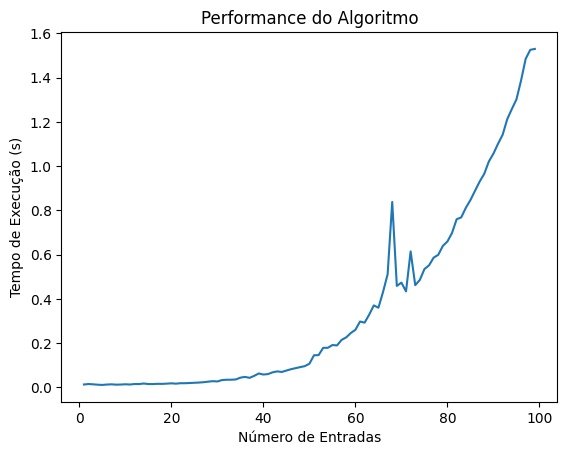

In [5]:
import subprocess
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Função para executar um programa
def run_c_program(input_data):
    start_time = time.time()

    # Executa o programa em um processo separado
    process = subprocess.Popen(["./minefield"], stdin=subprocess.PIPE, stdout=subprocess.PIPE, text=True)
    output, _ = process.communicate(input_data)

    end_time = time.time()
    execution_time = end_time - start_time

    return output, execution_time

# Função para plotar o gráfico de performance
def plot_performance(data):
    x = [i for i in range(1, len(data) + 1)]
    plt.plot(x, data)
    plt.xlabel('Número de Entradas')
    plt.ylabel('Tempo de Execução (s)')
    plt.title('Performance do Algoritmo')
    plt.show()
    
def generate_minefield(N, p):
    # Verifica se a probabilidade está dentro do intervalo válido
    if p < 0 or p > 1:
        raise ValueError("A probabilidade deve estar entre 0 e 1")

    # Inicializa uma matriz N x N com zeros
    M = np.zeros((N, N), dtype=int)

    # Percorre cada elemento da matriz e define seu valor com base na probabilidade p
    for i in range(N):
        for j in range(N):
            if random.random() < p:
                M[i][j] = 1

    return M

def matrix_to_text(M):
    # Obtém o número de linhas e colunas da matriz
    rows_num, cols_num = M.shape

    # Inicializa a variável de texto
    text = f"{rows_num} {cols_num}\n"

    # Percorre cada linha da matriz
    for i in range(rows_num):
        # Percorre cada elemento da linha e adiciona ao texto com um espaço
        for j in range(cols_num):
            text += str(M[i][j]) + " "
        # Remove o espaço extra no final da linha e adiciona uma quebra de linha
        text = text.rstrip() + "\n"

    return text

# Gerar entradas para o programa em C
input_data = "1\n2\n3\n"  # Exemplo de dados de entrada gerados pelo programa em Python

# Medir o tempo de execução do programa em C para diferentes entradas
performance_data = []
for i in range(1, 100):  
    M = generate_minefield(i*i, 0.75)
    input_data = matrix_to_text(M)  
    output, execution_time = run_c_program(input_data)
    #print(f"input:\n{input_data}\noutput:\n{output}")
    performance_data.append(execution_time)

# Plotar o gráfico de performance
plot_performance(performance_data)